In [49]:
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
from scipy.special import erf
from scipy.stats import gaussian_kde

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'serif', 'serif':['Palatino']})
rc('text', usetex=True)
rc('xtick', labelsize=16) 
rc('ytick', labelsize=16) 

# set-up color map 
from matplotlib.colors import LinearSegmentedColormap
cmap_name = 'my_list'
colors = np.asarray([(237,248,251), (158,188,218), (140,150,198), (136,86,167), (129,15,124)])/256.0
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

## Load All Samples -- individual event samples and emcee output

In [3]:
BBH_names = ['GW151012', 'GW170608', 'GW170729', 'GW151226', 'GW170814', 'GW150914', 'GW170104', 'GW170809', 'GW170818', 'GW170823']

In [46]:
# GWTC-1 samples: input into mcmc
sampleDict = np.load('./sampleDict.npy').item()

# Data outputted from mcmc
mu_sigma2_sample_chain = np.load('./mu_sigma2_samples.npy')

# Data post-processing 
mu_sigma2_processed = np.load('./mu_sigma2_samples_postprocessed.npy')

# LALinference versus population distribution informed priors
new_posteriors = np.load('population_informed_chieff_posteriors.npy').item()

## Plotting individual event samples

sampleDict keys = 'Xeff', 'Xeff_prior', 'weights'

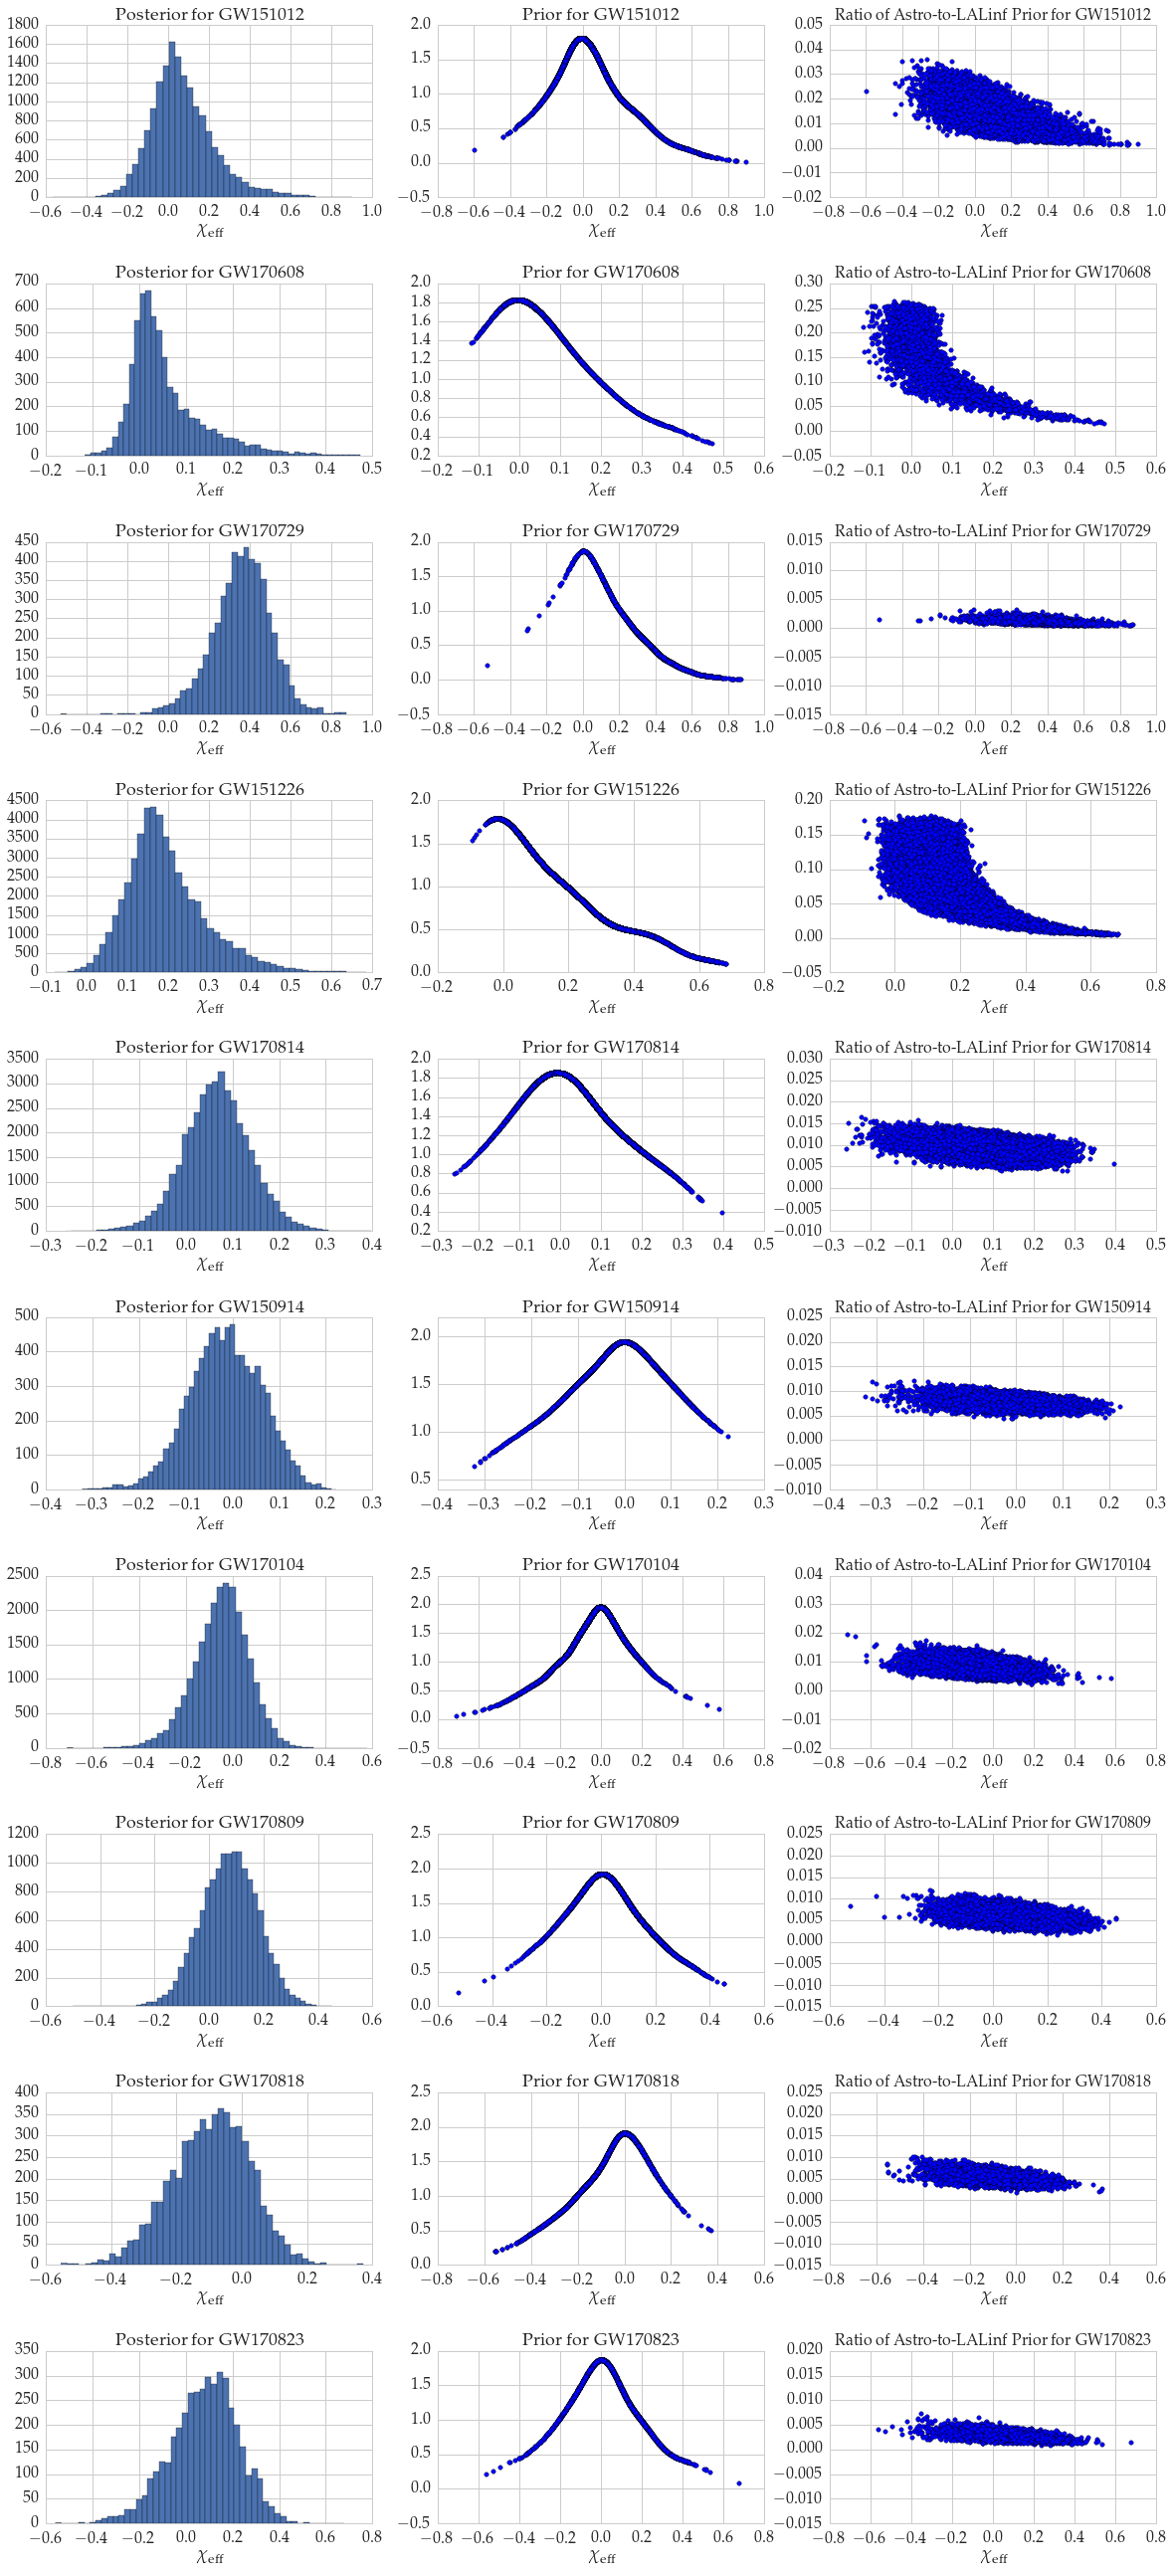

In [10]:
fig, axes = plt.subplots(10,3, figsize=(20, 45))

for i,event in enumerate(sampleDict.values()): 
    
    xeff_posterior_samps = event['Xeff']
    xeff_prior_values = event['Xeff_prior']
    weights = event['weights']
    
    axes[i,0].hist(xeff_posterior_samps, bins = 50)
    axes[i,0].set_xlabel(r'$\chi_\mathrm{eff}$',fontsize=18)
    axes[i,0].set_title('Posterior for {}'.format(BBH_names[i]),fontsize=18)
    
    axes[i,1].scatter(xeff_posterior_samps, xeff_prior_values)
    axes[i,1].set_xlabel(r'$\chi_\mathrm{eff}$',fontsize=18)
    axes[i,1].set_title('Prior for {}'.format(BBH_names[i]),fontsize=18)
    
    axes[i,2].scatter(xeff_posterior_samps, weights)
    axes[i,2].set_xlabel(r'$\chi_\mathrm{eff}$',fontsize=18)
    axes[i,2].set_title('Ratio of Astro-to-LALinf Prior for {}'.format(BBH_names[i]),fontsize=16)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Plotting direct output from emcee: $\mu$ and $\sigma^2$ chains

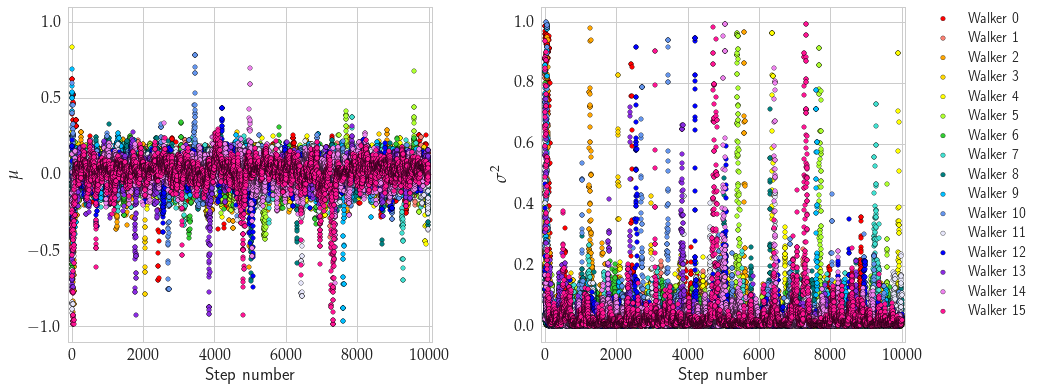

In [16]:
# Plotting sample chain before post-processing

sns.set_style('whitegrid')

nSteps=10000
steps = np.arange(nSteps)
colors = ['red', 'salmon', 'orange', 'gold', 'yellow', 'greenyellow', 'limegreen', 'turquoise', 
          'teal', 'deepskyblue', 'cornflowerblue', 'lavender', 'blue', 'blueviolet', 'violet', 'deeppink']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

for i in np.arange(16):
    ax1.scatter(steps, mu_sigma2_sample_chain[i,:,0], c=colors[i])
    ax2.scatter(steps, mu_sigma2_sample_chain[i,:,1], c=colors[i], label='Walker {}'.format(i))

ax1.set_ylabel(r'$\mu$', fontsize=18)
ax1.set_xlabel('Step number', fontsize=18)
ax1.set_ylim(-1.1,1.1)
ax1.set_xlim(-100,nSteps+100)

ax2.set_ylabel(r'$\sigma^2$', fontsize=18)
ax2.set_xlabel('Step number', fontsize=18)
ax2.set_ylim(-0.05,1.05)
ax2.set_xlim(-100,nSteps+100)

ax2.legend(fontsize=14, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplots_adjust(wspace=0.3)
plt.show()

mu sample chains


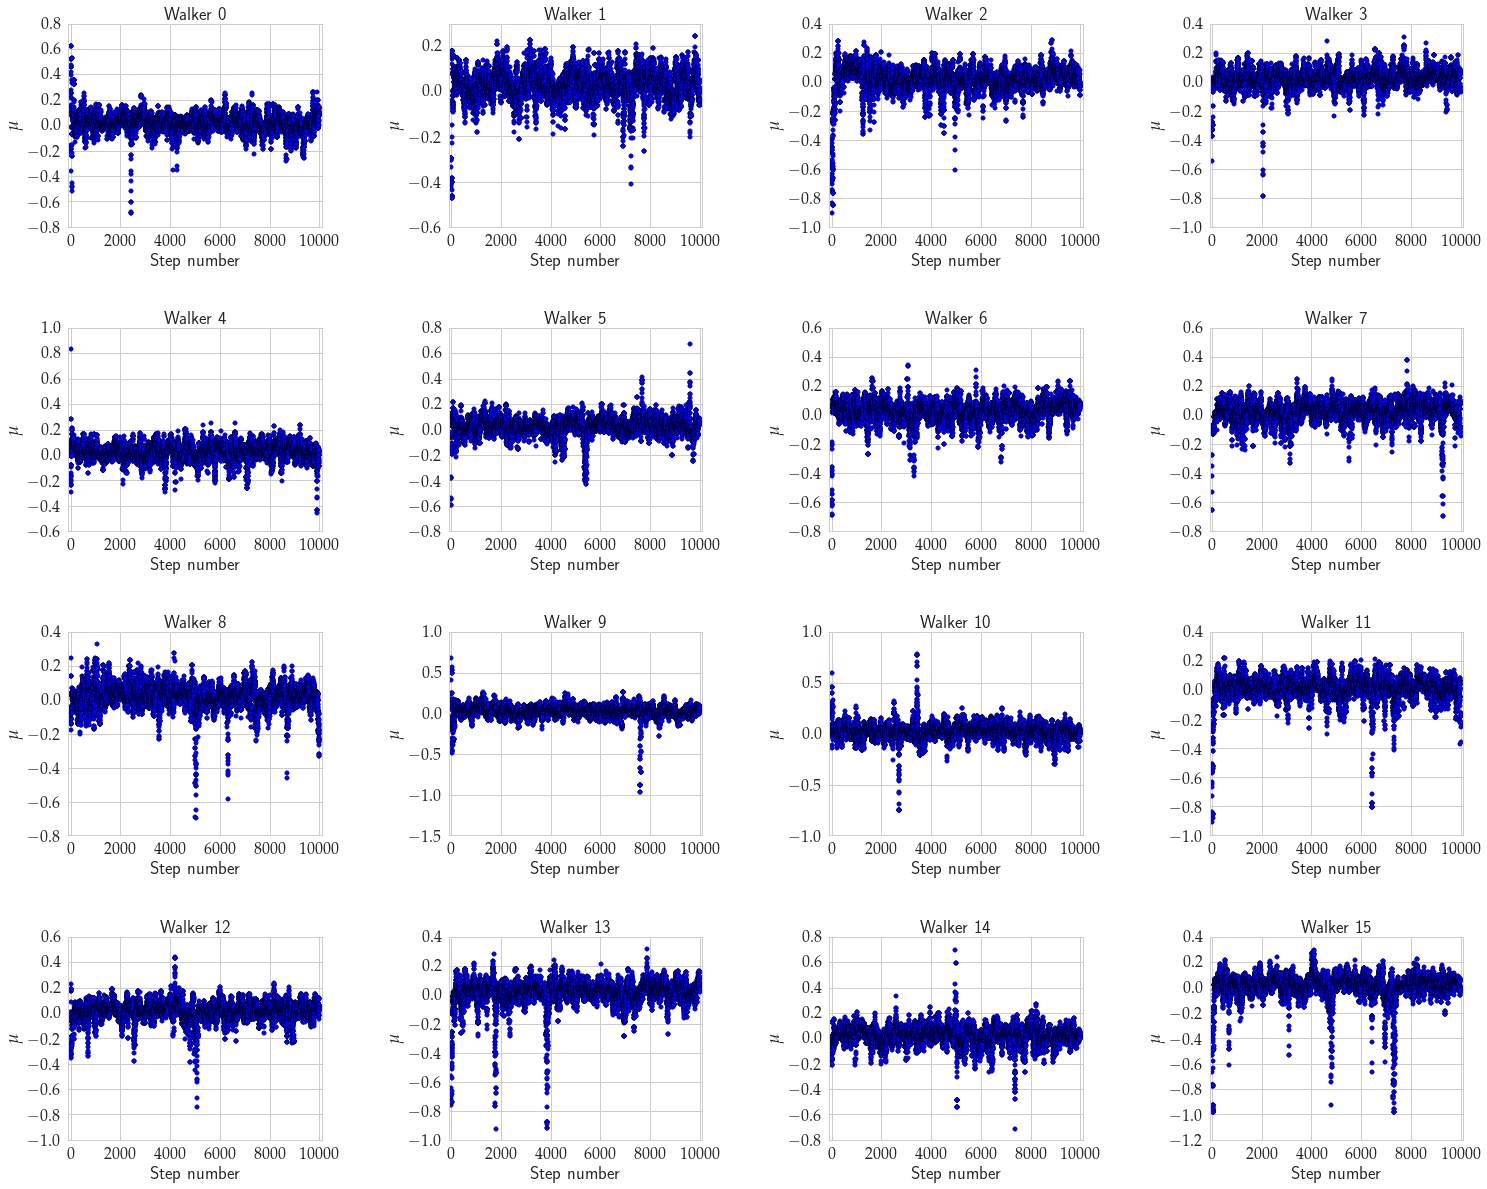

sigma^2 sample chains


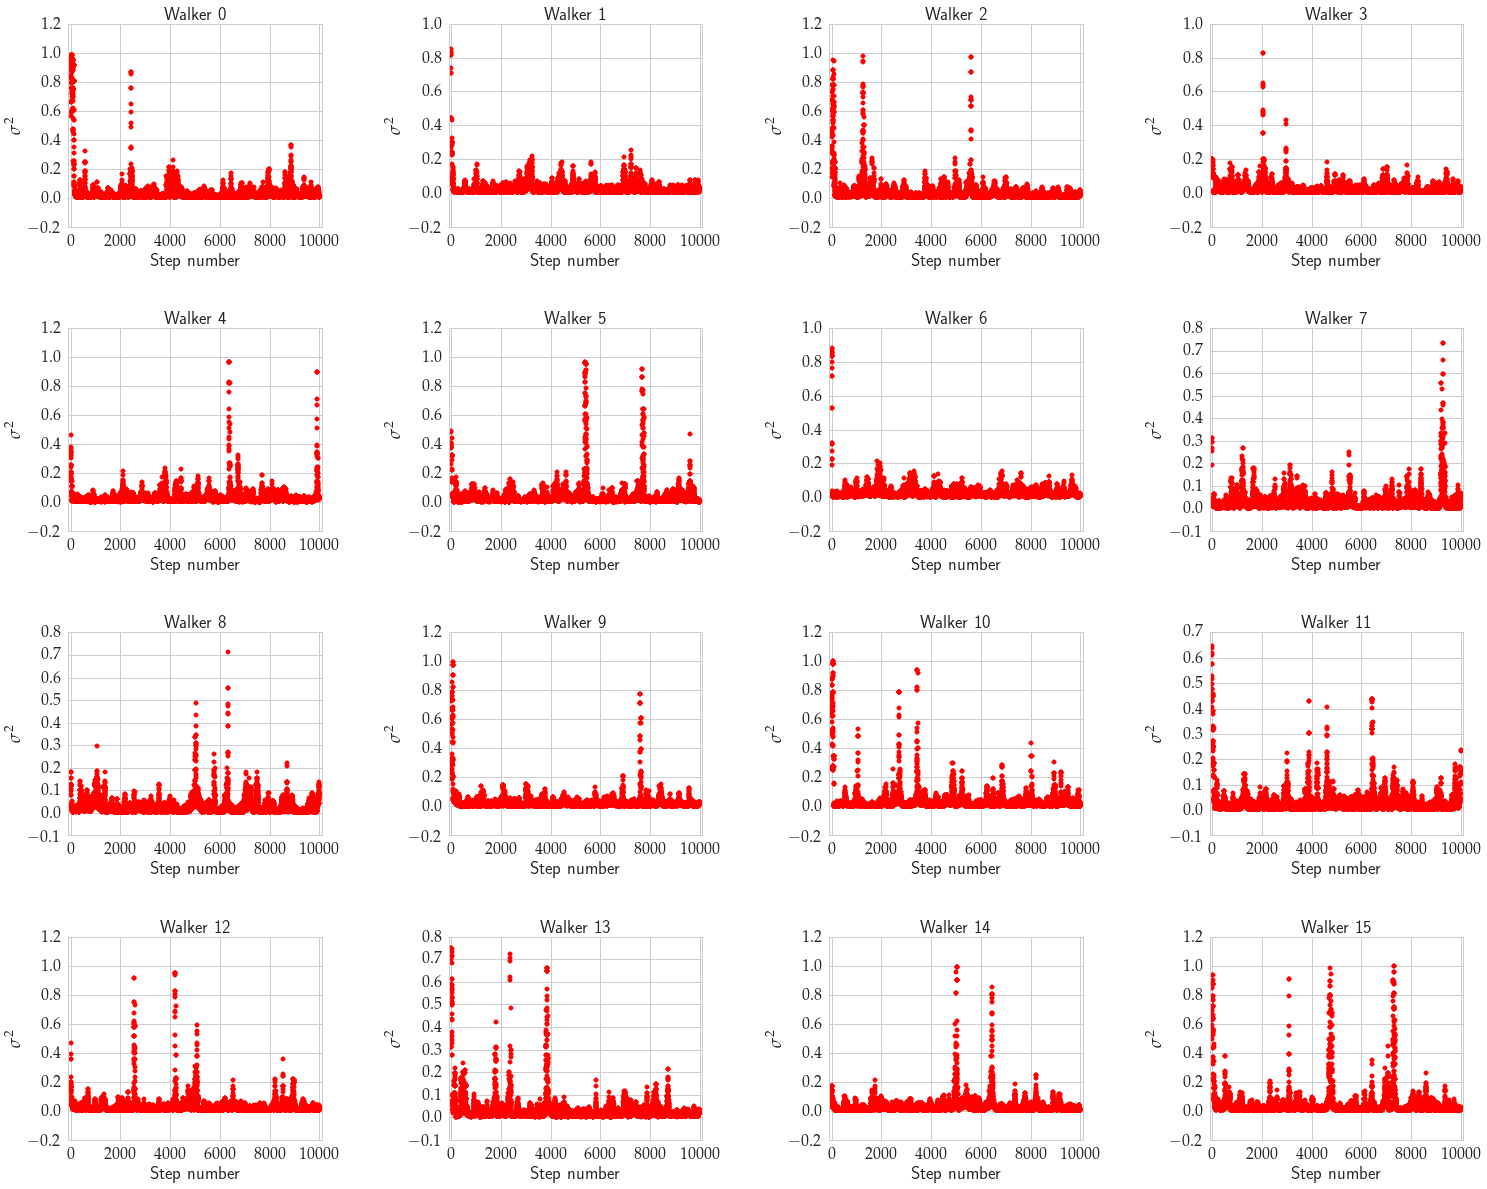

In [19]:
# looking at walker chains independently

print('mu sample chains')

# mu 
fig, axes = plt.subplots(4, 4, figsize=(25, 20))
i=0
for ax in axes:
    for ax_i in ax:
        ax_i.scatter(steps, mu_sigma2_sample_chain[i,:,0])
        ax_i.set_ylabel(r'$\mu$', fontsize=18)
        ax_i.set_xlabel('Step number', fontsize=18)
        ax_i.set_title('Walker {}'.format(i), fontsize=18)
        ax_i.set_xlim(-100,nSteps+100)
        i+=1

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

print('sigma^2 sample chains')

# sigma^2 
fig, axes = plt.subplots(4, 4, figsize=(25, 20))
i=0
for ax in axes:
    for ax_i in ax:
        ax_i.scatter(steps, mu_sigma2_sample_chain[i,:,1], color='red')
        ax_i.set_ylabel(r'$\sigma^2$', fontsize=18)
        ax_i.set_xlabel('Step number', fontsize=18)
        ax_i.set_title('Walker {}'.format(i), fontsize=18)
        ax_i.set_xlim(-100,nSteps+100)
        i+=1

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

## Looking at samples post-processing

In [26]:
# Assign mu and sigma^2 samples to their own variables 
mu_samples = mu_sigma2_processed[:,0]
sigma2_samples = mu_sigma2_processed[:,1]

In [27]:
# Processed data -- how many samples left?
print "# of mu samples: {}".format(mu_samples.size)
print "# of sigma^2 samples: {}".format(sigma2_samples.size)

# of mu samples: 1104
# of sigma^2 samples: 1104


### Corner plot

In [32]:
# Calculate confidence intervals 

def percentile(array, percentage): 
    nSamples = array.size
    idx = int(percentage*nSamples)
    arr_sorted = np.sort(array)
    return arr_sorted[idx]

# -- mu -- 
mu_mid = percentile(mu_samples, 0.5)
mu_plus = percentile(mu_samples, 0.975) - percentile(mu_samples, 0.5)
mu_minus =  percentile(mu_samples, 0.5) - percentile(mu_samples, 0.025)

print('mu = {} +{} / -{}'.format(mu_mid, mu_plus, mu_minus))

# -- sigma^2 -- 
sigma_upper = percentile(sigma2_samples, 0.95)

print('sigma^2 < {}'.format(sigma_upper))

mu = 0.0262482806292 +0.109404528139 / -0.144664613091
sigma^2 < 0.0695675264593


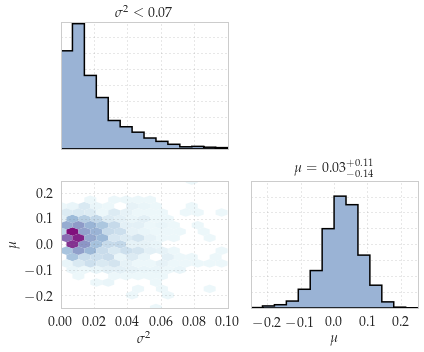

In [35]:
rc('xtick', labelsize=14) 
rc('ytick', labelsize=14) 

fig = plt.figure(figsize=(6,5))

# data for sigma^2
ax00 = fig.add_subplot(221)
ax00.hist(sigma2_samples, bins=np.linspace(0.,0.1,15), normed=True,  orientation='vertical', linewidth=1.5, histtype='stepfilled', color=cm(0.3))
ax00.set_xlim(0, 0.15)
ax00.get_yaxis().set_ticklabels([])
plt.setp(ax00.get_xticklabels(), visible=False)
ax00.grid(linestyle=':', linewidth=0.75, color='grey', zorder=1, alpha=0.5)
ax00.set_title(r'$\sigma^2 < 0.07$', fontsize=14)

# data for mu
ax11 = fig.add_subplot(224)
ax11.hist(mu_samples, bins=np.linspace(-0.25,0.25,15), normed=True, orientation='vertical', linewidth=1.5, histtype='stepfilled', color=cm(0.3))
ax11.set_xlim(-0.25, 0.25)
ax11.get_yaxis().set_ticklabels([])
ax11.set_xlabel(r"$\mu$", fontsize=14)
ax11.grid(linestyle=':', linewidth=0.75, color='grey', zorder=1,alpha=0.5)
ax11.set_title(r'$\mu = 0.03^{+0.11}_{-0.14}$', fontsize=14)

# 2D density plot
ax10 = fig.add_subplot(223,sharex=ax00)
ax10.hexbin(sigma2_samples,mu_samples, cmap=cm, gridsize=(14,10), extent=(0.,0.1,-0.25,0.25), zorder=0, mincnt=1, linewidths=(0,))
ax10.set_ylabel(r"$\mu$", fontsize=14)
ax10.set_xlabel(r"$\sigma^2$", fontsize=14)
ax10.set_ylim(-0.25, 0.25)
ax10.set_xlim(0, 0.1)
ax10.grid(True,which='major',linestyle=':', linewidth=0.75, color='grey', zorder=2,alpha=0.5)

plt.tight_layout()

plt.show()

### PDF and CDF plots

In [36]:
def calculate_Gaussian(x, mu, sigma2): 
    
    # Normalization coefficient calculated in Mathematica:
    norm = np.sqrt(sigma2*np.pi/2)*(erf((1-mu)/np.sqrt(2*sigma2)) + erf((1+mu)/np.sqrt(2*sigma2))) 
    
    # Gaussian distribution! 
    y = (1.0/norm)*np.exp((-1.0*(x-mu)**2)/(2*sigma2)) 
    
    return y

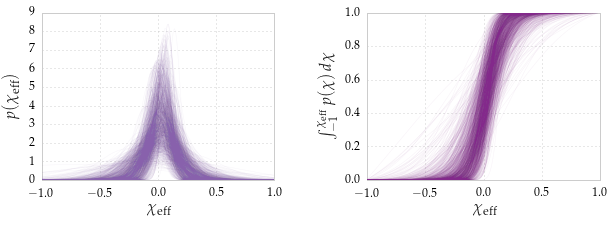

In [41]:
dx = 0.01
x = np.arange(-1, 1+dx, dx)

fig, [ax1,ax2] = plt.subplots(1, 2, figsize = (10,3))

rc('xtick', labelsize=12, color='black')
rc('ytick', labelsize=12, color='black')

for sample in mu_sigma2_processed: 
    
    mu = sample[0]
    sigma2 = sample[1]
    
    # Left subplot = PDF
    g = calculate_Gaussian(x, mu, sigma2) 
    ax1.plot(x, g, linewidth=0.65, alpha = 0.05, color=cm(0.7), zorder=3)
    
    # Right subplot = CDF
    cdf = np.cumsum(g)*dx
    ax2.plot(x, cdf, linewidth=0.65, alpha = 0.05, color=cm(0.9), zorder=3)

ax1.set_xlabel(r'$\chi_\mathrm{eff}$', fontsize=16)
ax1.set_ylabel(r'$p(\chi_\mathrm{eff})$', fontsize=16)
ax1.grid(linestyle=':', linewidth=0.75, color='silver', zorder=1)
ax1.set_xlim(-1, 1)

ax2.set_xlabel(r'$\chi_\mathrm{eff}$', fontsize=16)
ax2.set_ylabel(r'$\int^{\chi_\mathrm{eff}}_{-1} p(\chi) \, d\chi$', fontsize=16)
ax2.grid(linestyle=':', linewidth=0.75, color='silver', zorder=1)
ax2.set_xlim(-1, 1)
ax2.set_ylim(0,1)

fig.subplots_adjust(wspace=0.4)

plt.show()

### Histogram for bin analysis

In [42]:
dx = 0.001
Delta = 0.05

x_1 = np.arange(-1.0, (-1.0*Delta)+dx, dx)
x_2 = np.arange(-1.0*Delta, Delta+dx, dx)
x_3 = np.arange(Delta, 1.0+dx, dx)

x1_probs = np.array([])
x2_probs = np.array([])
x3_probs = np.array([])

for data in mu_sigma2_processed: 

    mu = data[0]
    sigma2 = data[1]
    
    bin1 = np.sum(calculate_Gaussian(x_1, mu, sigma2))*dx
    bin2 = np.sum(calculate_Gaussian(x_2, mu, sigma2))*dx
    bin3 = np.sum(calculate_Gaussian(x_3, mu, sigma2))*dx
    
    x1_probs = np.append(x1_probs,bin1)
    x2_probs = np.append(x2_probs,bin2)
    x3_probs = np.append(x3_probs,bin3)

frac_informative = x1_probs+x3_probs
frac_inf_positive = x3_probs/frac_informative

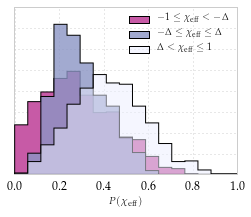

In [44]:
plt.figure(figsize = (4,3))

# colors (r, g, b, alpha)
c1 = (140/256.,150/256.,198/256.,0.8)
c2 = (237/256.,240/256.,256/256.,0.5)
c3 = (200/256.,90/256.,167/256.,1)

plt.hist(x1_probs, bins=np.linspace(0.,1,18), normed=True, linewidth=1.5, histtype='stepfilled', 
         fc=c3, ec='black', lw=1.0, zorder=3, label=r'$-1\leq\chi_\mathrm{eff}<-\Delta$')

plt.hist(x2_probs, bins=np.linspace(0.,1,18), normed=True, linewidth=1.5, histtype='stepfilled', 
         fc=c1, ec='black', lw=1.0, zorder=3, label=r'$-\Delta\leq\chi_\mathrm{eff}\leq \Delta$')

plt.hist(x3_probs, bins=np.linspace(0.,1,18), normed=True, linewidth=1.5, histtype='stepfilled', 
         fc=c2, ec='black', lw=1.0, zorder=3, label=r'$\Delta<\chi_\mathrm{eff}\leq1$')

frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.xlabel("$P(\chi_\mathrm{eff})$")

plt.grid(linestyle=':', linewidth=0.75, color='silver', zorder=1)
plt.xlim(-0.003, 1.0)
plt.legend()

plt.show()

### Violin plot comparing posteriors

In [47]:
# Xeff grid
dX = 0.001
Xeff_grid = np.arange(-1, 1+dX, dX)

In [51]:
# Making KDEs for LALinference chi-eff posteriors 
old_posteriors_KDE = {}
for name in BBH_names: 
    
    print('Generating KDE for {} posterior...'.format(name))
    
    post = sampleDict[name]['Xeff']
    post_KDE = gaussian_kde(post)
    old_posteriors_KDE[name] = post_KDE(Xeff_grid)

Generating KDE for GW151012 posterior...
Generating KDE for GW170608 posterior...
Generating KDE for GW170729 posterior...
Generating KDE for GW151226 posterior...
Generating KDE for GW170814 posterior...
Generating KDE for GW150914 posterior...
Generating KDE for GW170104 posterior...
Generating KDE for GW170809 posterior...
Generating KDE for GW170818 posterior...
Generating KDE for GW170823 posterior...


In [52]:
# Generating color pallete
colors_rand = [0.07721291,  0.10611038,  0.17551625,  0.26262026,  0.34226807,  0.40500475, 0.43288902,  0.58343267,  0.64765525,  0.79076754]
facecolors = []
edgecolors = []
for r in colors_rand:
    facecolors.append(cm(r))
    edgecolors.append(cm(r+0.15))

In [53]:
# So that events can be plotted in order of occurance
BBH_names_sorted = np.sort(BBH_names)
print BBH_names_sorted 

['GW150914' 'GW151012' 'GW151226' 'GW170104' 'GW170608' 'GW170729'
 'GW170809' 'GW170814' 'GW170818' 'GW170823']


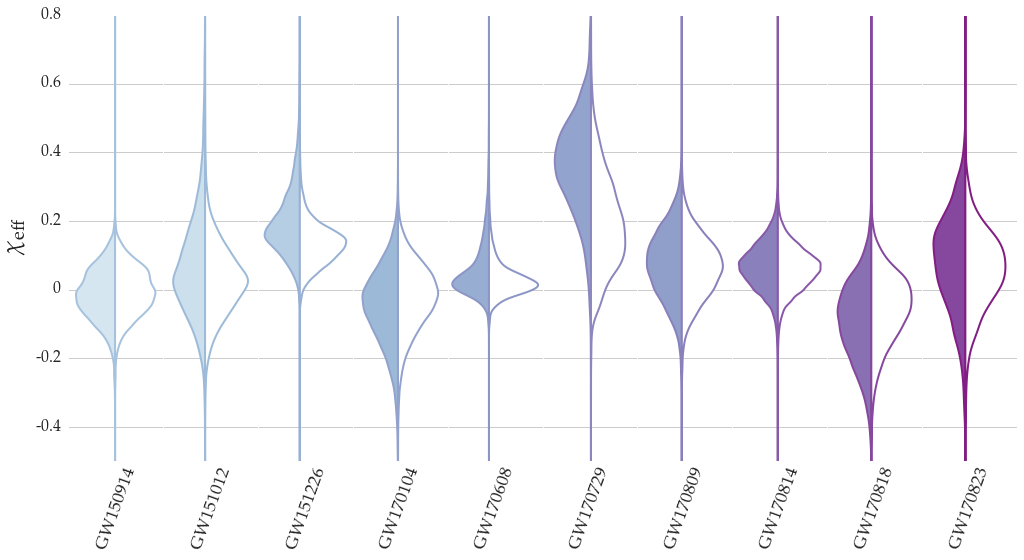

In [54]:
# Make violin plot

rc('axes',edgecolor='white')

fig, axes = plt.subplots(1, 10, figsize =(17, 8))

for i,ax in enumerate(axes):
    
    name = BBH_names_sorted[i]
    
    ax.fill(-1.0*old_posteriors_KDE[name], Xeff_grid, label='Using LAL Prior', lw=2, fc=facecolors[i], ec = edgecolors[i])
    ax.fill(new_posteriors[name], Xeff_grid, label='Using Pop. Dist as Prior', lw=2, fc='white', ec=edgecolors[i])
    
    ax.set_xlabel(name, fontsize=18, rotation=70)
    
    ax.set_ylim(-0.5,0.8)
    ax.set_xlim(-1.0*(np.max(old_posteriors_KDE[name])+1), np.max(new_posteriors[name])+1)
    ax.get_yaxis().set_ticklabels([])
    ax.get_xaxis().set_ticks([])

axes[0].set_ylabel(r'$\chi_{\mathrm{eff}}$', fontsize=24)
axes[0].get_yaxis().set_ticklabels([-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8])

plt.subplots_adjust(wspace=0)

plt.show()

In [57]:
# -- Finding area under some posteriors --

# GW151226 
count = 0
for i in sampleDict['GW151226']['Xeff']: 
    if i > 0:
        count+=1
print "Prob X>0 with old GW151226 posterior = {}".format(1.0*count/sampleDict['GW151226']['Xeff'].size)
print "Prob X>0 with new GW151226 posterior = {}".format(np.sum(new_posteriors['GW151226'][Xeff_grid.size/2:])*dX)
print ""

# GW170729 
count = 0
for i in sampleDict['GW170729']['Xeff']: 
    if i > 0:
        count+=1
print "Prob X>0 with old GW170729 posterior = {}".format(1.0*count/sampleDict['GW170729']['Xeff'].size)
print "Prob X>0 with new GW170729 posterior = {}".format(np.sum(new_posteriors['GW170729'][Xeff_grid.size/2:])*dX)
print ""

# GW170817
count = 0
for i in sampleDict['GW170818']['Xeff']: 
    if i < 0:
        count+=1
print "Prob X<0 with old GW170818 posterior = {}".format(1.0*count/sampleDict['GW170818']['Xeff'].size)
print "Prob X<0 with new GW170818 posterior = {}".format(np.sum(new_posteriors['GW170818'][:Xeff_grid.size/2])*dX)
print ""

Prob X>0 with old GW151226 posterior = 0.994679629488
Prob X>0 with new GW151226 posterior = 0.987151986997

Prob X>0 with old GW170729 posterior = 0.987676056338
Prob X>0 with new GW170729 posterior = 0.92334111257

Prob X<0 with old GW170818 posterior = 0.778062094848
Prob X<0 with new GW170818 posterior = 0.672316661354

